In [1]:
#importing necesarry libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import zipfile

In [2]:
url='https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv'
data=pd.read_csv(url)
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
#shape of tha data=
data.shape

(32560, 15)

32560- rows


15- columns

In [4]:
#all the column names that are present in dataset
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [5]:
#some information about datset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


It gives us the basic information about dataset like null values in individual column or datatype of the respective column

as wee see there are null values in this dataset and many columns datatype are object type which we need to convert into int or float as we cannot normalize the object dataype

In [6]:
#lets check one by one null values in each column
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

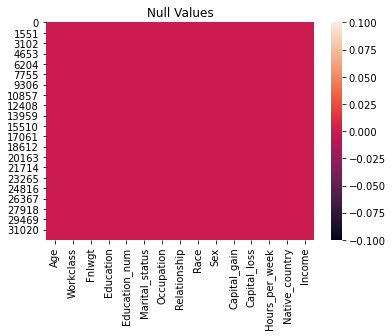

In [7]:
#lets check ull values through heatmap also
sns.heatmap(data.isna())
plt.title('Null Values')
plt.show()

There is no null values in any of the column in dataset

In [8]:
#lets summarize the dataset
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
#datatypes of each column i.e what type of data column held in 
data.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

There are so many column of object datatype which we need to change into int or float so that we can normalise to check normally distribution

###### Check every column one by one

In [10]:
#check unique value of Workclass column
data['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [11]:
#lets check the value count of Workclass column
data['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

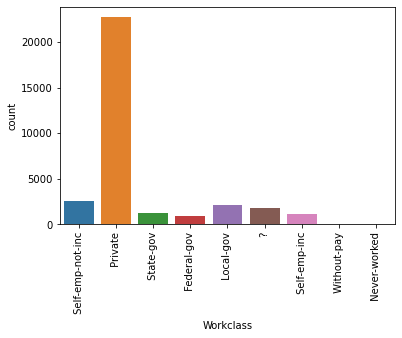

In [12]:
#lets plot the value count Workclass column
sns.countplot(data['Workclass'])
plt.xticks(rotation=90)
plt.show()

There are ?(question Mark) in Workclass values lets chnage that first

In [13]:
from sklearn.preprocessing import LabelEncoder



In [14]:
lab=LabelEncoder()
df=lab.fit_transform(data['Workclass'])
data['Worksclass']=df
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Worksclass
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,6
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,4
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,4
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,4
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,4
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,4
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,4
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,4


we have changed the Workclass column into the numerical data 

1.Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked 

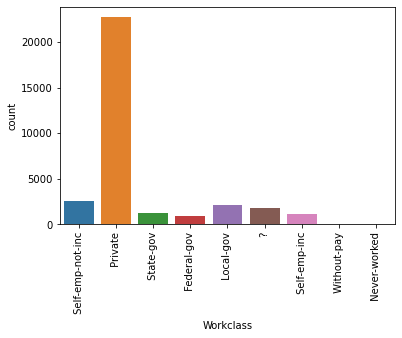

In [15]:
#now lets check the countplot graph again
sns.countplot(data['Workclass'])
plt.xticks(rotation=90)
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
lab1=LabelEncoder()
df1=lab1.fit_transform(data['Income'])
data['Income']=df1
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Worksclass
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,6
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,4
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,4
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,4
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,4
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,4
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,4
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,4


We have changed the or encode the Income column 

1. >=50k - 0
2. <50k -1

In [18]:
#lets check the unique values if Income column
data['Income'].unique()

array([0, 1])

In [19]:
#lets count the values of Income column
data['Income'].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

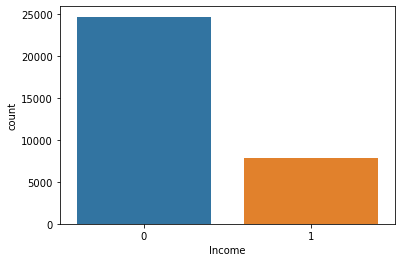

In [20]:
#lets just plot the countplot for Income column
sns.countplot(data['Income'])
plt.show()

In [21]:
#lets check the unique values of Education column
data['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [22]:
#lets count the value of Education column
data['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

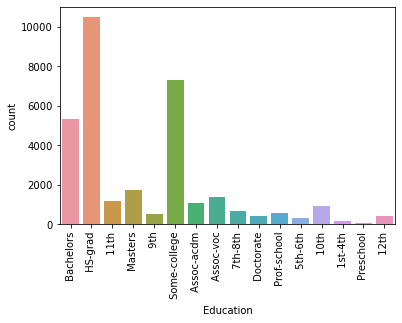

In [23]:
#lets plot the count plot for Education column
sns.countplot(data['Education'])
plt.xticks(rotation=90)
plt.show()

In [24]:
#lets encode the Education column to numerical datatype
lab2=LabelEncoder()
df2=lab2.fit_transform(data['Education'])
data['Education']=df2
data['Education']

0         9
1        11
2         1
3         9
4        12
         ..
32555     7
32556    11
32557    11
32558    11
32559    11
Name: Education, Length: 32560, dtype: int32

We have changed the Education column data into numerical datatype through Label encoding

In [25]:
#lets again check the value count of Education column
data['Education'].value_counts()

11    10501
15     7291
9      5354
12     1723
8      1382
1      1175
7      1067
0       933
5       646
14      576
6       514
2       433
10      413
4       333
3       168
13       51
Name: Education, dtype: int64

In [26]:
#lets check the unique value of Marital_status column
data['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [27]:
#lets check the countplot of Marital_status column
data['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

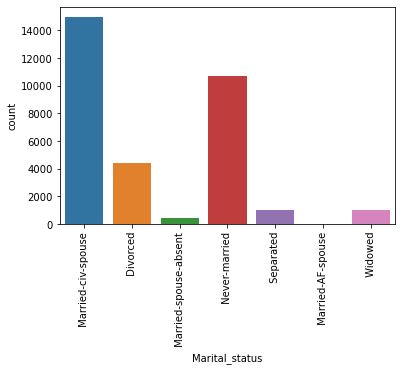

In [28]:
#lets plot the count plot for Marital_status column
sns.countplot(data['Marital_status'])
plt.xticks(rotation=90)
plt.show()

In [29]:
#lets encode the Marital_status column
lab3=LabelEncoder()
df3=lab3.fit_transform(data['Marital_status'])
data['Marital_status']=df3
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Worksclass
0,50,Self-emp-not-inc,83311,9,13,2,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,6
1,38,Private,215646,11,9,0,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,4
2,53,Private,234721,1,7,2,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,4
3,28,Private,338409,9,13,2,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,4
4,37,Private,284582,12,14,2,Exec-managerial,Wife,White,Female,0,0,40,United-States,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,7,12,2,Tech-support,Wife,White,Female,0,0,38,United-States,0,4
32556,40,Private,154374,11,9,2,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,4
32557,58,Private,151910,11,9,6,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,4
32558,22,Private,201490,11,9,4,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,4


we have changed the object datatype of Marital_status column to the int dataype

In [30]:
#lets check the unique value of Occupation column
data['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [31]:
#lets count the values of Occupation column
data['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [32]:
#lets label encoding the Occupation column
lab4=LabelEncoder()
df4=lab4.fit_transform(data['Occupation'])
data['Occupation']=df4
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Worksclass
0,50,Self-emp-not-inc,83311,9,13,2,4,Husband,White,Male,0,0,13,United-States,0,6
1,38,Private,215646,11,9,0,6,Not-in-family,White,Male,0,0,40,United-States,0,4
2,53,Private,234721,1,7,2,6,Husband,Black,Male,0,0,40,United-States,0,4
3,28,Private,338409,9,13,2,10,Wife,Black,Female,0,0,40,Cuba,0,4
4,37,Private,284582,12,14,2,4,Wife,White,Female,0,0,40,United-States,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,7,12,2,13,Wife,White,Female,0,0,38,United-States,0,4
32556,40,Private,154374,11,9,2,7,Husband,White,Male,0,0,40,United-States,1,4
32557,58,Private,151910,11,9,6,1,Unmarried,White,Female,0,0,40,United-States,0,4
32558,22,Private,201490,11,9,4,1,Own-child,White,Male,0,0,20,United-States,0,4


WE have success fully changed the Occupation column into int

Relationship Column


In [33]:
#lets check the unique value of Relationship Column
data['Relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [34]:
#lets count the values of Relationship column
data['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

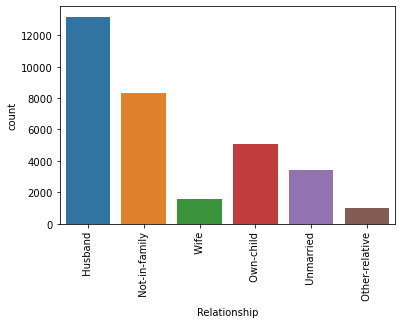

In [35]:
#lets plot the countplot of Relationship column
sns.countplot(data['Relationship'])
plt.xticks(rotation=90)
plt.show()

In [36]:
#lets label encoding the Relationship column
lab5=LabelEncoder()
df5=lab4.fit_transform(data['Relationship'])
data['Relationship']=df5
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Worksclass
0,50,Self-emp-not-inc,83311,9,13,2,4,0,White,Male,0,0,13,United-States,0,6
1,38,Private,215646,11,9,0,6,1,White,Male,0,0,40,United-States,0,4
2,53,Private,234721,1,7,2,6,0,Black,Male,0,0,40,United-States,0,4
3,28,Private,338409,9,13,2,10,5,Black,Female,0,0,40,Cuba,0,4
4,37,Private,284582,12,14,2,4,5,White,Female,0,0,40,United-States,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,7,12,2,13,5,White,Female,0,0,38,United-States,0,4
32556,40,Private,154374,11,9,2,7,0,White,Male,0,0,40,United-States,1,4
32557,58,Private,151910,11,9,6,1,4,White,Female,0,0,40,United-States,0,4
32558,22,Private,201490,11,9,4,1,3,White,Male,0,0,20,United-States,0,4


We ahve changed the datatype of Relationship column

Race Column

In [37]:
#lets see the unique values in Race column
data['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [38]:
#lets count the value of Race column
data['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

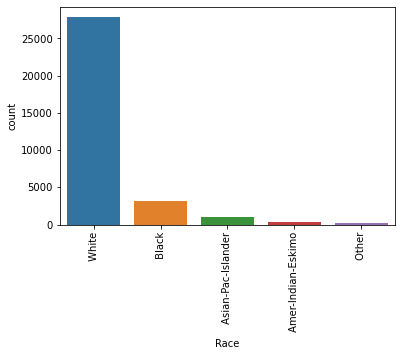

In [39]:
#lets plot the countplot for Race column
sns.countplot(data['Race'])
plt.xticks(rotation=90)
plt.show()

In [40]:
#lets label encoding the Relationship column
lab6=LabelEncoder()
df6=lab6.fit_transform(data['Race'])
data['Race']=df6
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Worksclass
0,50,Self-emp-not-inc,83311,9,13,2,4,0,4,Male,0,0,13,United-States,0,6
1,38,Private,215646,11,9,0,6,1,4,Male,0,0,40,United-States,0,4
2,53,Private,234721,1,7,2,6,0,2,Male,0,0,40,United-States,0,4
3,28,Private,338409,9,13,2,10,5,2,Female,0,0,40,Cuba,0,4
4,37,Private,284582,12,14,2,4,5,4,Female,0,0,40,United-States,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,7,12,2,13,5,4,Female,0,0,38,United-States,0,4
32556,40,Private,154374,11,9,2,7,0,4,Male,0,0,40,United-States,1,4
32557,58,Private,151910,11,9,6,1,4,4,Female,0,0,40,United-States,0,4
32558,22,Private,201490,11,9,4,1,3,4,Male,0,0,20,United-States,0,4


In [41]:
data=data.drop(columns=['Workclass'])
data

,Age,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Worksclass
0,50,83311,9,13,2,4,0,4,Male,0,0,13,United-States,0,6
1,38,215646,11,9,0,6,1,4,Male,0,0,40,United-States,0,4
2,53,234721,1,7,2,6,0,2,Male,0,0,40,United-States,0,4
3,28,338409,9,13,2,10,5,2,Female,0,0,40,Cuba,0,4
4,37,284582,12,14,2,4,5,4,Female,0,0,40,United-States,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,7,12,2,13,5,4,Female,0,0,38,United-States,0,4
32556,40,154374,11,9,2,7,0,4,Male,0,0,40,United-States,1,4
32557,58,151910,11,9,6,1,4,4,Female,0,0,40,United-States,0,4
32558,22,201490,11,9,4,1,3,4,Male,0,0,20,United-States,0,4


In [42]:
#lets check the unique values of Sex column
data['Sex'].unique()

array([' Male', ' Female'], dtype=object)

In [43]:
#lets count the values of Sex column
data['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

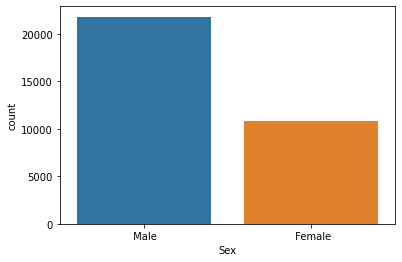

In [44]:
#lets plot the countplot for Sex column
sns.countplot(data['Sex'])
plt.show()

In [45]:
#lets label encoding the Sex column
lab7=LabelEncoder()
df7=lab7.fit_transform(data['Sex'])
data['Sex']=df7
data

,Age,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Worksclass
0,50,83311,9,13,2,4,0,4,1,0,0,13,United-States,0,6
1,38,215646,11,9,0,6,1,4,1,0,0,40,United-States,0,4
2,53,234721,1,7,2,6,0,2,1,0,0,40,United-States,0,4
3,28,338409,9,13,2,10,5,2,0,0,0,40,Cuba,0,4
4,37,284582,12,14,2,4,5,4,0,0,0,40,United-States,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,7,12,2,13,5,4,0,0,0,38,United-States,0,4
32556,40,154374,11,9,2,7,0,4,1,0,0,40,United-States,1,4
32557,58,151910,11,9,6,1,4,4,0,0,0,40,United-States,0,4
32558,22,201490,11,9,4,1,3,4,1,0,0,20,United-States,0,4


In [46]:
#lets check the Native_country column unique values
data['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [47]:
#lets count the Native_country column
data['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

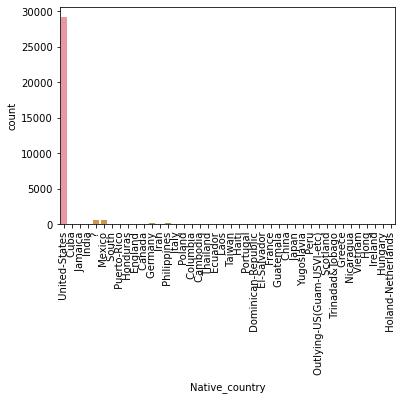

In [48]:
#lets plot the countplot for Native_country column
sns.countplot(data['Native_country'])
plt.xticks(rotation=90)
plt.show()

In [49]:
#lets label encoding the Sex column
lab8=LabelEncoder()
df8=lab8.fit_transform(data['Native_country'])
data['Native_country']=df8
data

,Age,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Worksclass
0,50,83311,9,13,2,4,0,4,1,0,0,13,39,0,6
1,38,215646,11,9,0,6,1,4,1,0,0,40,39,0,4
2,53,234721,1,7,2,6,0,2,1,0,0,40,39,0,4
3,28,338409,9,13,2,10,5,2,0,0,0,40,5,0,4
4,37,284582,12,14,2,4,5,4,0,0,0,40,39,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,7,12,2,13,5,4,0,0,0,38,39,0,4
32556,40,154374,11,9,2,7,0,4,1,0,0,40,39,1,4
32557,58,151910,11,9,6,1,4,4,0,0,0,40,39,0,4
32558,22,201490,11,9,4,1,3,4,1,0,0,20,39,0,4


###### Normal distribution

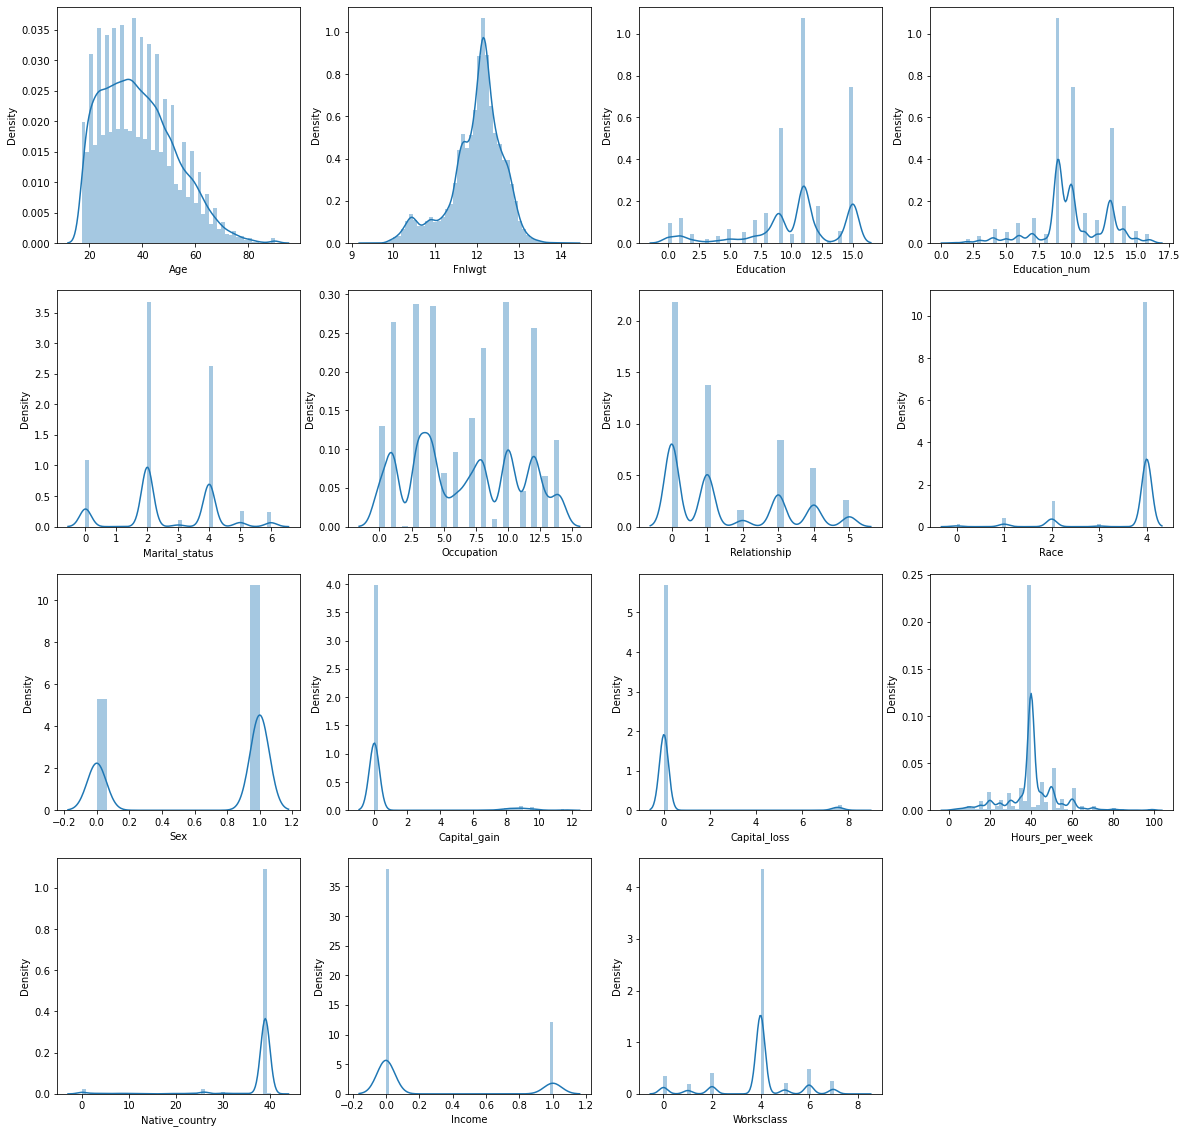

In [56]:
#lets check the normalization
plt.figure(figsize=(20,20))
plotnumber=1
for column in data:
    if plotnumber<=15:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

as we see the data are noy normally distributed

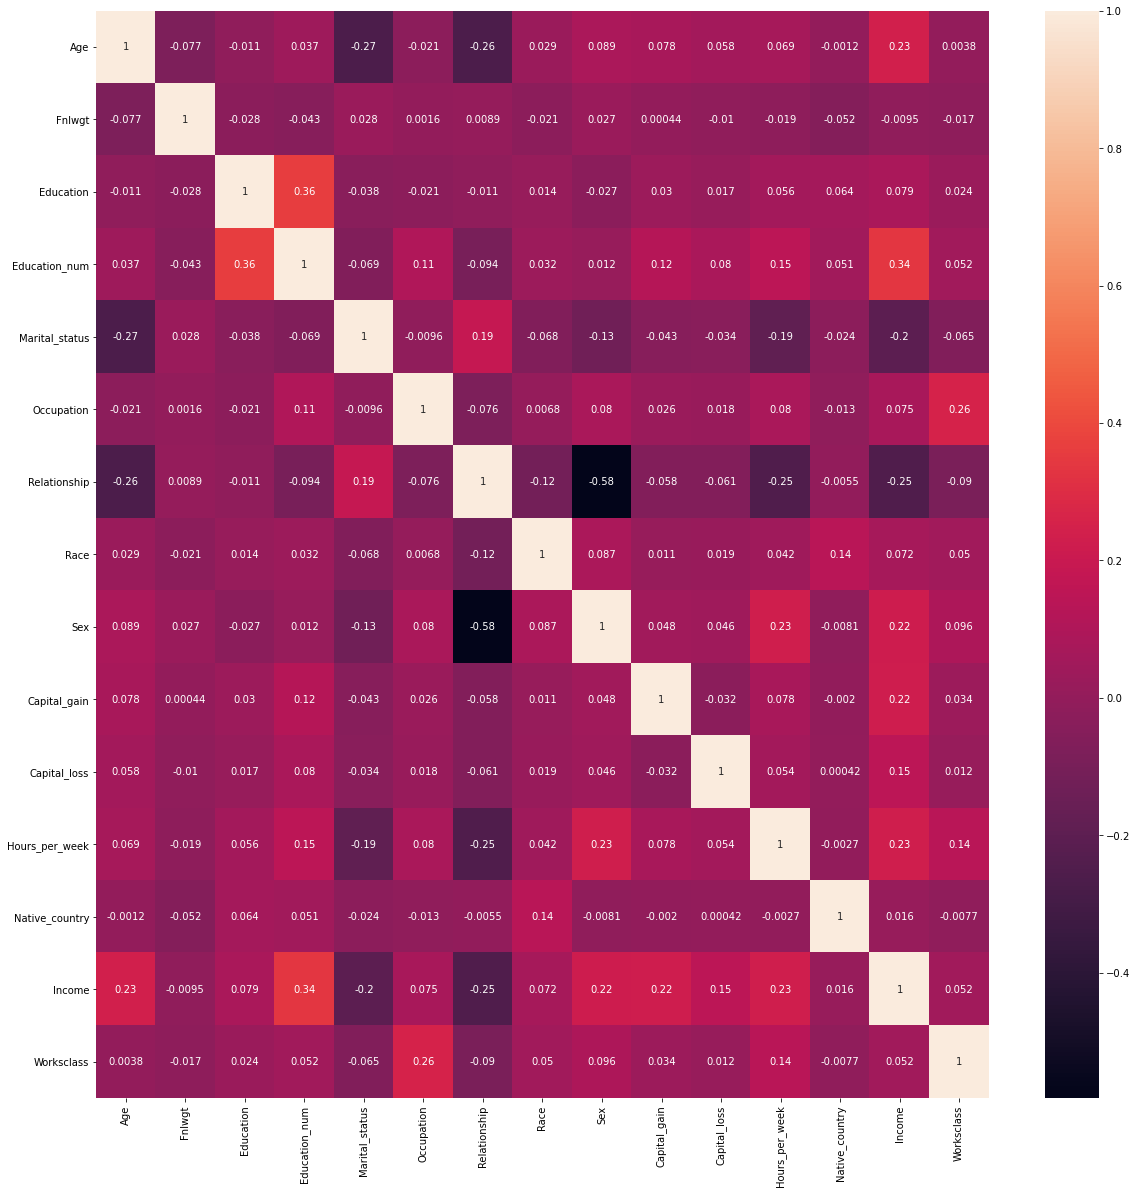

In [51]:
#checking correlation
plt.figure(figsize=(20,20))
data_corr=data.corr()
sns.heatmap(data_corr,annot=True,annot_kws={'size':10})
plt.show()

There are very less correlation or no correlation betewwn the column so can't decide on this delete any column

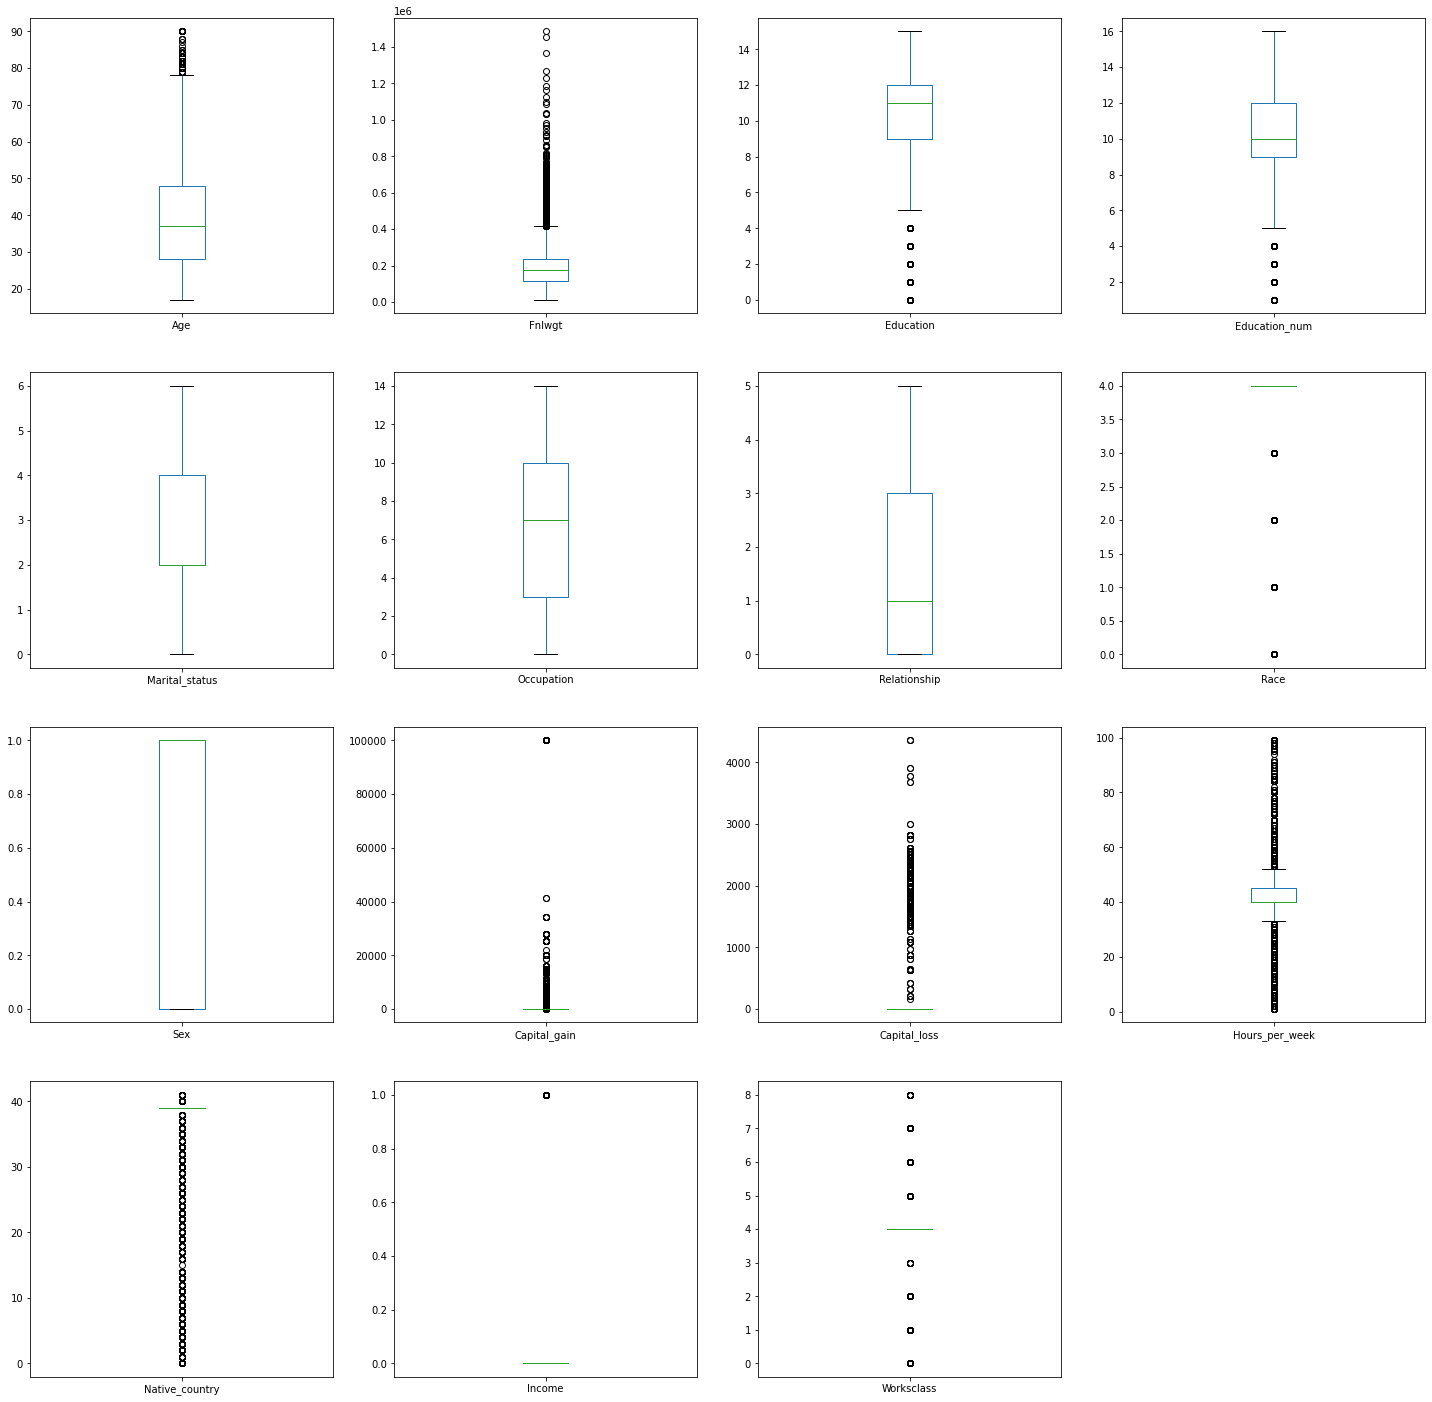

In [52]:
#plotting boxplot to check outliers
data.plot(kind='box',subplots = True,layout=(4,4),figsize = (25,25))
plt.show()

There is no much outliers in the column we need to solve it

In [53]:
#now check the skewness
data.skew()

Age                0.558738
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
Worksclass        -0.752280
dtype: float64

he data is very much skewed in all the columns lets rectify it

In [55]:
#making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution
skew=('Fnlwgt','Race','Capital_gain','Capital_loss','Native_country')
for col in skew:
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [54]:
#again check skewness of data
data.skew()

Age               0.558738
Fnlwgt           -0.842559
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.114540
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Capital_gain      3.096803
Capital_loss      4.307460
Hours_per_week    0.227636
Native_country   -3.658235
Income            1.212383
Worksclass       -0.752280
dtype: float64

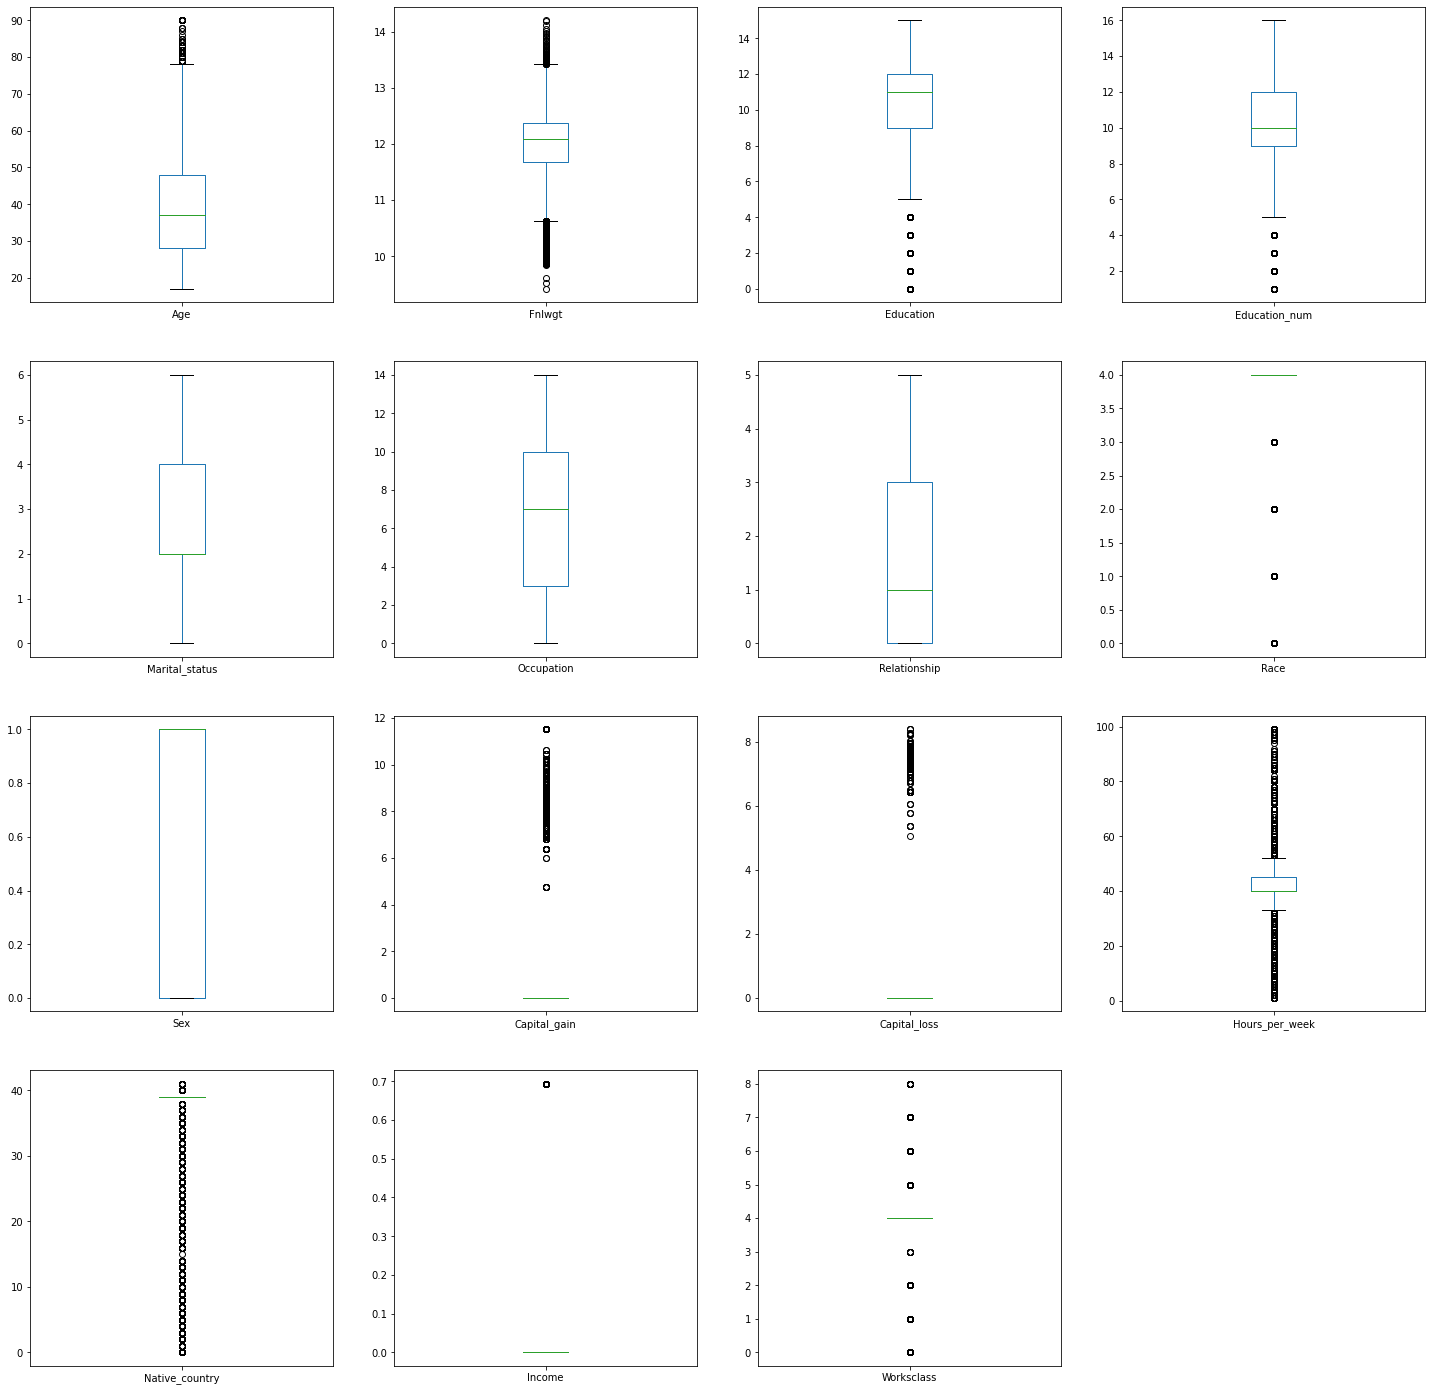

In [55]:
#plotting boxplot to check outliers
data.plot(kind='box',subplots = True,layout=(4,4),figsize = (25,25))
plt.show()

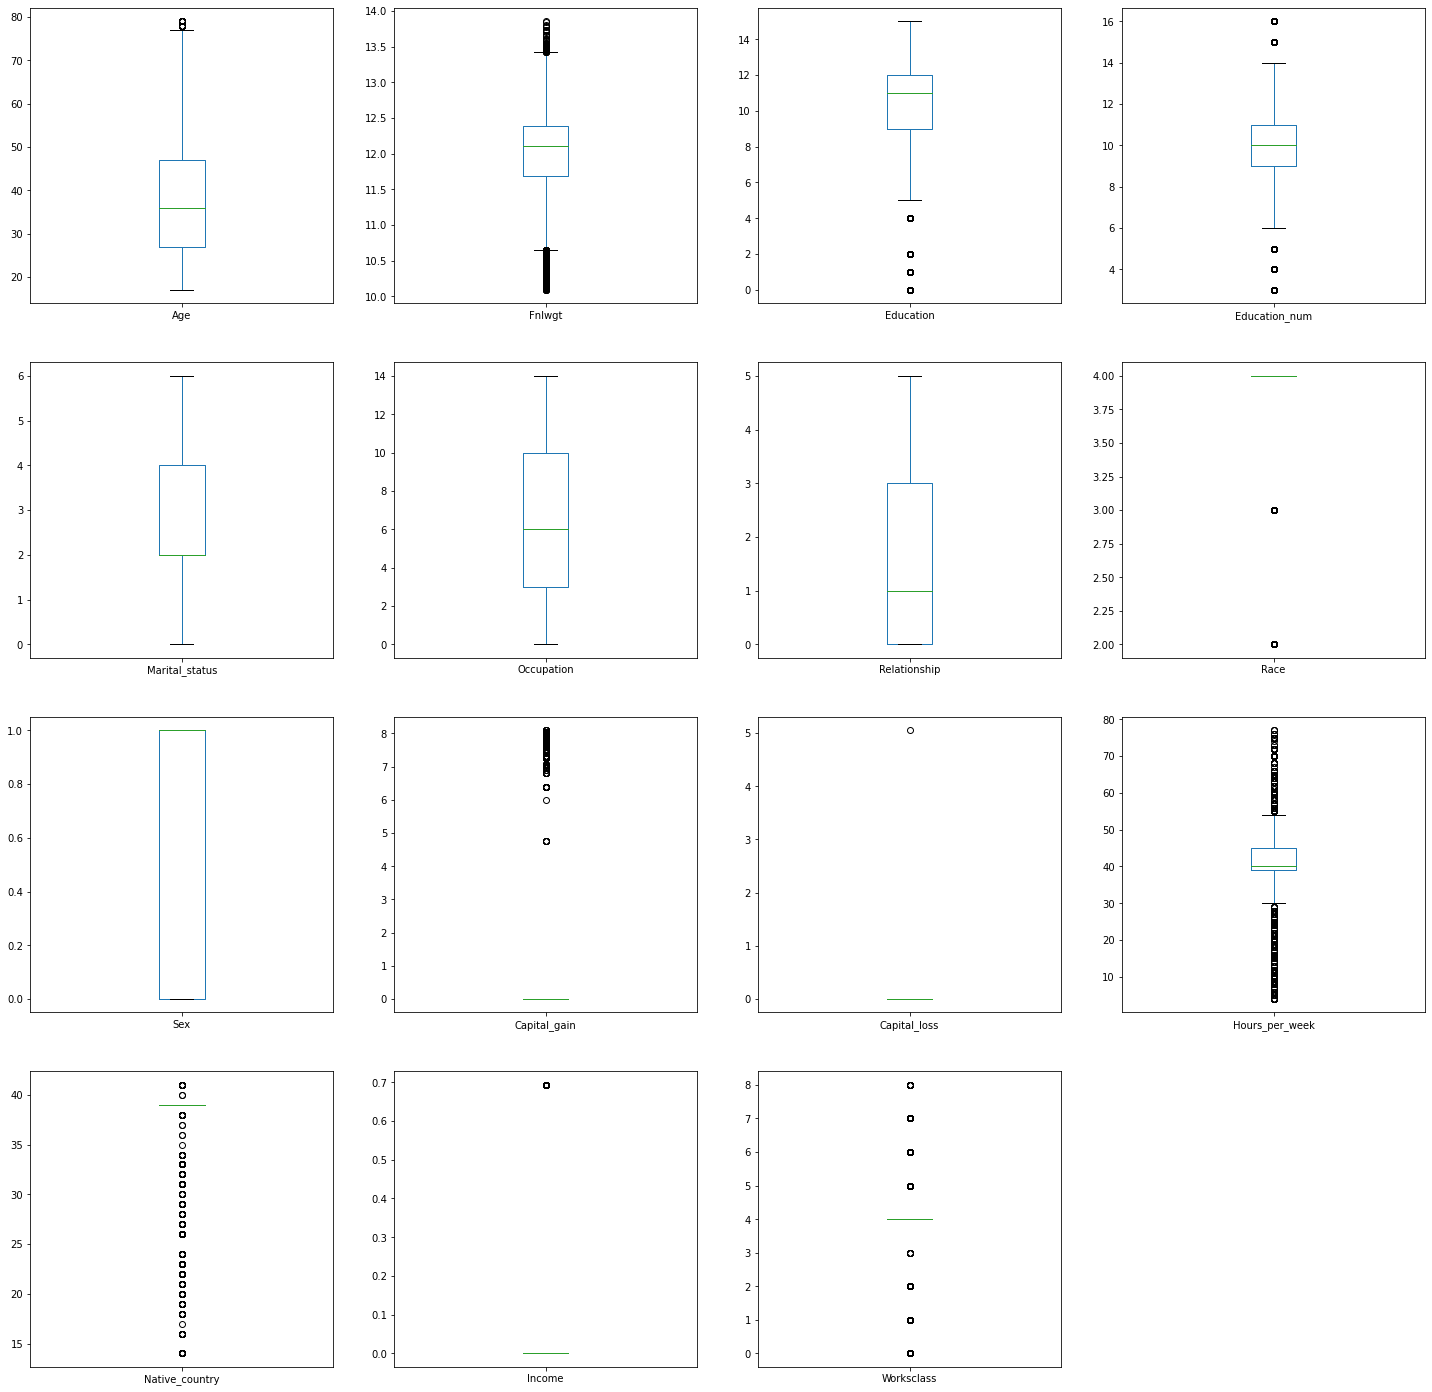

In [61]:
#again check the outliers
data.plot(kind='box',subplots = True,layout=(4,4),figsize = (25,25))
plt.show()

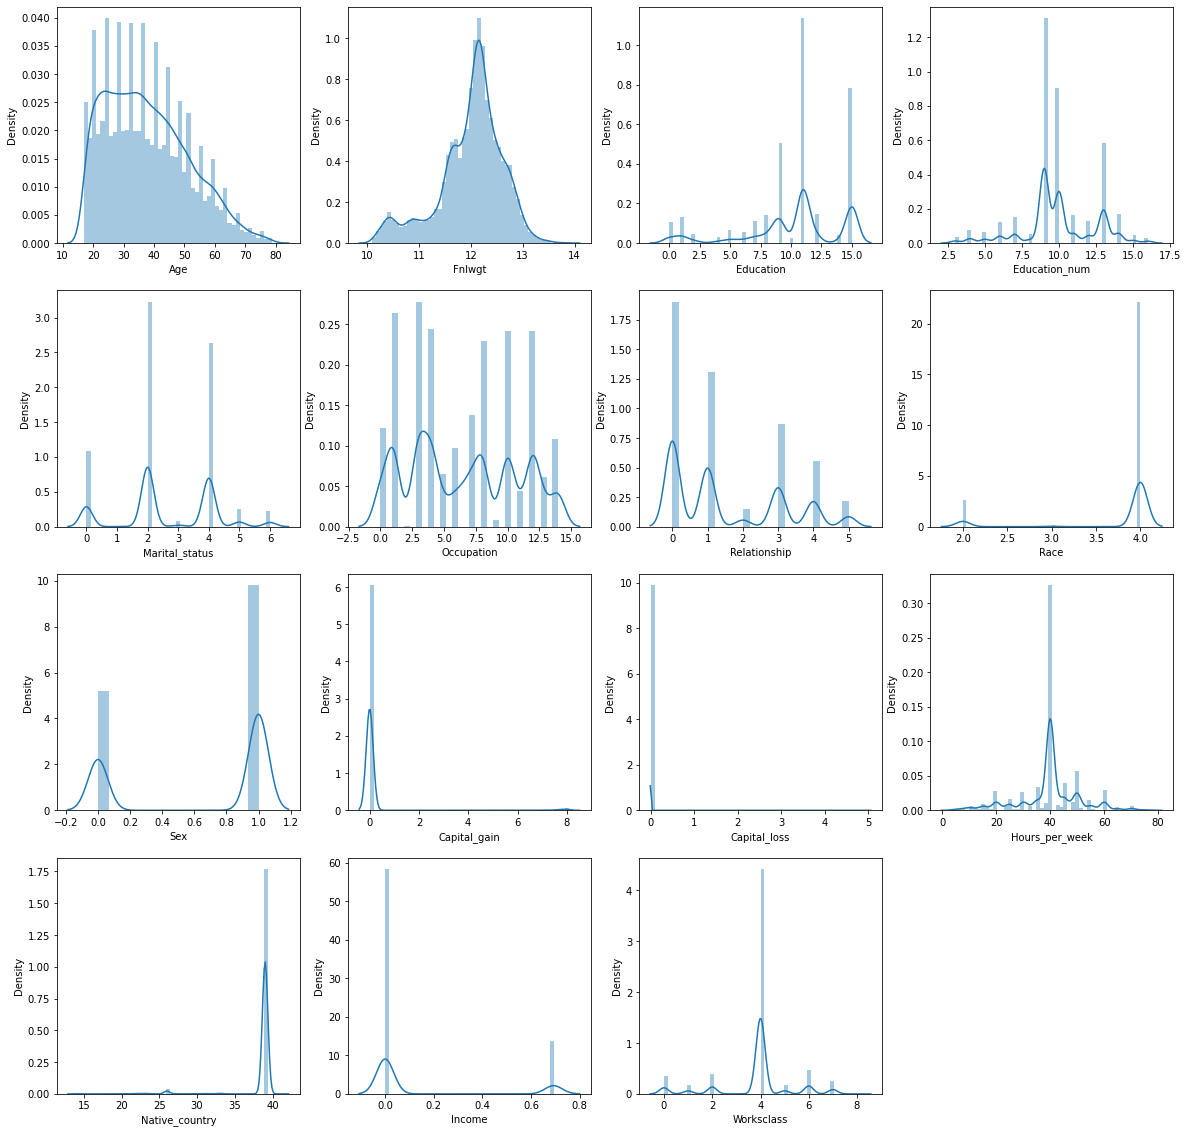

In [62]:
#again check the normal distribution
plt.figure(figsize=(20,20))
plotnumber=1
for column in data:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

###### Splitting the data

In [57]:
x=data.drop(columns=['Income'])
y=data['Income']

In [58]:
#check shape of x and y 
print('Shape of x is :',x.shape,'\n\n') 
print('Shape of y is :',y.shape,'\n\n')


Shape of x is : (32560, 14) 


Shape of y is : (32560,) 




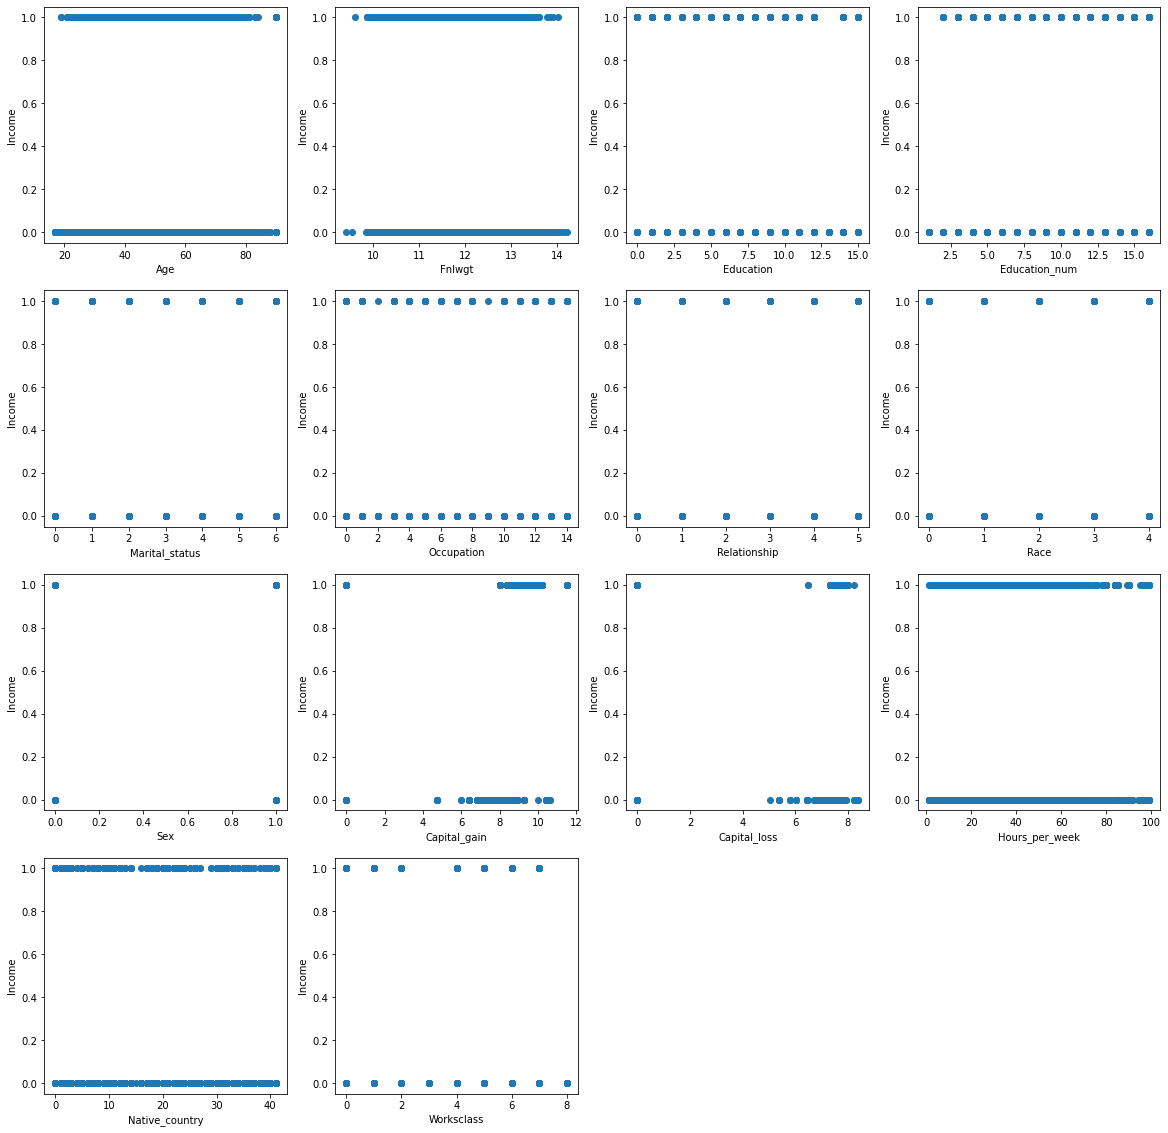

In [59]:
#check relationship between x and y 
plt.figure(figsize=(20,20))
plotnumber=1
for column in x:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Income')
    plotnumber+=1
plt.show()

In [60]:
#importing standard scler to scale the x 
from sklearn.preprocessing import StandardScaler

In [61]:
s1=StandardScaler()  #instantiate
scaled1=s1.fit_transform(x)
scaled1.shape[1]

14

In [62]:
#import train_test_split
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test=train_test_split(scaled1,y,test_size=0.40,random_state=123)

###### 1st Model Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve

In [65]:
lr=LogisticRegression()  #instantiate
lr.fit(x_train,y_train)

LogisticRegression()

In [66]:
#Trainig Accuracy of Logistic Regression Model
lr.score(x_train,y_train)

0.8155200655200655

In [67]:
y_pred_lr=lr.predict(x_test)



In [68]:
#testing accuracy of Logistic Regression Model
accuracy_score(y_test,y_pred_lr)

0.8208691646191646

Training score of Logictis Regression Model- 81%

Testing score of Logictis Regression Model- 82%

In [70]:
#confusion matric of logistic Regression Model
confusion_matrix(y_test,y_pred_lr)

array([[9252,  646],
       [1687, 1439]], dtype=int64)

In [71]:
#classification report
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      9898
           1       0.69      0.46      0.55      3126

    accuracy                           0.82     13024
   macro avg       0.77      0.70      0.72     13024
weighted avg       0.81      0.82      0.81     13024



all the score are given in classification report

In [72]:
#plt_roc_curve for Logistic Regression Model
fpr,tpr,thresholds=roc_curve(y_test,y_pred_lr)

In [73]:
print('False Positive Rates are :',fpr)
print('True Positive Rates are :',tpr)
print('Thresholds are :',thresholds)

False Positive Rates are : [0.         0.06526571 1.        ]
True Positive Rates are : [0.         0.46033269 1.        ]
Thresholds are : [2 1 0]


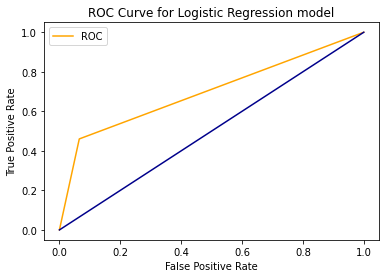

In [74]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression model')
plt.legend()
plt.show()

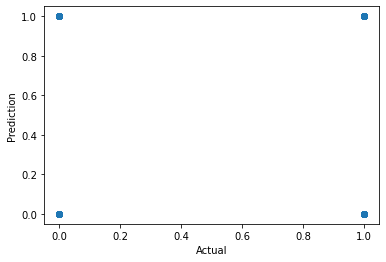

In [75]:
#conclusion of Logistic Regression Model
plt.scatter(y_test,y_pred_lr)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

###### 2nd Model KNN Model

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
knn=KNeighborsClassifier()  #instantiate
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [78]:
#Training accuracy of KNN model
knn.score(x_train,y_train)

0.8760749385749386

In [79]:
y_pred_knn=knn.predict(x_test)

In [80]:
#Testing accuracy of KNN Model
accuracy_score(y_test,y_pred_knn)

0.8255528255528255

Training Accuracy of KNN Model -87%

Testing Accuracy of KNN Model -82%

###### Hyperparameter Tuning for KNN Model

In [82]:
from sklearn.feature_selection import SelectKBest,f_classif


In [83]:
#select best features
best_features=SelectKBest(score_func=f_classif,k=7)
fit=best_features.fit(x,y)
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(x.columns)
#concatenate
feature_scores=pd.concat([data_columns,data_scores], axis=1)
feature_scores.columns=['Feature_Name','score']
print(feature_scores.nlargest(7,'score'))

      Feature_Name        score
3    Education_num  4120.741694
9     Capital_gain  2979.387244
6     Relationship  2187.696334
0              Age  1886.677918
11  Hours_per_week  1813.339094
8              Sex  1593.288816
4   Marital_status  1346.636300


In [85]:
#Model Building
new_x=data[['Education_num','Capital_gain','Relationship','Age','Hours_per_week','Sex','Marital_status']]
new_x

,Education_num,Capital_gain,Relationship,Age,Hours_per_week,Sex,Marital_status
0,13,0.000000,0,50,13,1,2
1,9,0.000000,1,38,40,1,0
2,7,0.000000,0,53,40,1,2
3,13,0.000000,5,28,40,0,2
4,14,0.000000,5,37,40,0,2
...,...,...,...,...,...,...,...
32555,12,0.000000,5,27,38,0,2
32556,9,0.000000,0,40,40,1,2
32557,9,0.000000,4,58,40,0,6
32558,9,0.000000,3,22,20,1,4


In [86]:
#scalling the new x
scaler=StandardScaler()
scaled_new_x=scaler.fit_transform(new_x)
scaled_new_x

array([[ 1.13477863, -0.29921644, -0.90017662, ..., -2.22212013,
         0.70308748, -0.40618296],
       [-0.42002663, -0.29921644, -0.27780963, ..., -0.03542999,
         0.70308748, -1.73402603],
       [-1.19742926, -0.29921644, -0.90017662, ..., -0.03542999,
         0.70308748, -0.40618296],
       ...,
       [-0.42002663, -0.29921644,  1.58929131, ..., -0.03542999,
        -1.42229812,  2.2495032 ],
       [-0.42002663, -0.29921644,  0.96692433, ..., -1.65520046,
         0.70308748,  0.92166012],
       [-0.42002663,  3.61918788,  2.21165829, ..., -0.03542999,
        -1.42229812, -0.40618296]])

In [87]:
#again instantiating for hyperparameter tuning
knn1=KNeighborsClassifier()
knn1.fit(x_train,y_train)

KNeighborsClassifier()

In [88]:
y_pred_knn1=knn1.predict(x_test)

In [89]:
#accuracy of training data
knn1.score(x_train,y_train)

0.8760749385749386

In [90]:
#Testing Score of KNN Model after Hyperparameter 
accuracy_score(y_test,y_pred_knn1)

0.8255528255528255

fter hyperparameter tuning also te accuracy remains the same 82%

In [91]:
#confusion matric of KNN Model
confusion_matrix(y_test,y_pred_knn)

array([[8833, 1065],
       [1207, 1919]], dtype=int64)

In [92]:
#classification report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      9898
           1       0.64      0.61      0.63      3126

    accuracy                           0.83     13024
   macro avg       0.76      0.75      0.76     13024
weighted avg       0.82      0.83      0.82     13024



In [93]:
#plt_roc_curve for Logistic Regression Model
fpr1,tpr1,thresholds1=roc_curve(y_test,y_pred_knn)

In [94]:
print('False Positive Rates are :',fpr1)
print('True Positive Rates are :',tpr1)
print('Thresholds are :',thresholds1)

False Positive Rates are : [0.         0.10759749 1.        ]
True Positive Rates are : [0.         0.61388356 1.        ]
Thresholds are : [2 1 0]


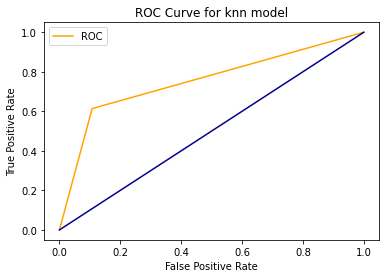

In [95]:
plt.plot(fpr1,tpr1,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for knn model')
plt.legend()
plt.show()

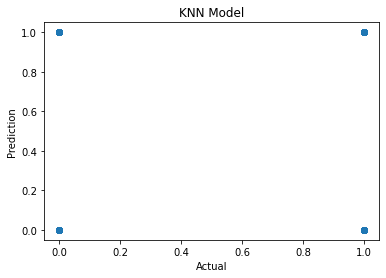

In [96]:
#conclusions of KNN Model
plt.scatter(y_test,y_pred_knn)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('KNN Model')
plt.show()

###### 3rd Model Decision Tree Classifier Model

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
dt=DecisionTreeClassifier()  #instantiate
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [99]:
#Training score of Decision tree Model
dt.score(x_train,y_train)

1.0

In [100]:
y_pred_dt=dt.predict(x_test)

In [101]:
#Accuracy of testing data
accuracy_score(y_test,y_pred_dt)

0.8066646191646192

Training score of Decision Tree Model is 100%

Testing Score of Decision Tree Model is 80%

###### Hyperparameter tuning for Decision Tree Model 

In [102]:
grid_params1={'max_depth':[1,2,3,4,5,6,7,8],
              'min_samples_leaf':[1,2,3,4,5,6,7,8],
               'max_features':['auto','log2','sqrt',None],
               'max_leaf_nodes':[1,2,3,4,5,6,7,8]}
print(grid_params1)

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8], 'max_features': ['auto', 'log2', 'sqrt', None], 'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8]}


In [103]:
from sklearn.model_selection import GridSearchCV
grid_dt=GridSearchCV(dt,param_grid=grid_params1,cv=3,verbose=3)

In [104]:
grid_dt.fit(x_train,y_train)

Fitting 3 folds for each of 2048 candidates, totalling 6144 fits
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=1, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=1, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=1, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=1, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=1, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=1, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=1, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=1, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=1, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=4, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=4, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=4, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8;

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=8, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=8, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=8, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=8, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=8, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=8, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=8, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=8, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=8, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=8, min_samples_leaf=7;

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=4, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=4, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=4, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=4, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=4, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=4, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=4, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=4, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=4, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=4, min_samples_leaf=4;

[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=7, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=7, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=7, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=7, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=7, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=7, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=7, min_samples_leaf=8;

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4;

[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=2;

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=2, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=2, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=2, min_samples_leaf=5;

[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=5, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=5, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=5, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=5, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=5, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=6, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=6, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=6, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=6, min_samples_leaf=2;

[CV 1/3] END max_depth=2, max_features=auto, max_leaf_nodes=1, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=auto, max_leaf_nodes=1, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=auto, max_leaf_nodes=1, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=auto, max_leaf_nodes=1, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=auto, max_leaf_nodes=1, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=auto, max_leaf_nodes=1, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=auto, max_leaf_nodes=1, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=auto, max_leaf_nodes=1, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=auto, max_leaf_nodes=1, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=auto, max_leaf_nodes=1, min_samples_leaf=7;

[CV 3/3] END max_depth=2, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=auto, max_leaf_nodes=4, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=auto, max_leaf_nodes=4, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=auto, max_leaf_nodes=4, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=auto, max_leaf_nodes=5, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=auto, max_leaf_nodes=5, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=auto, max_leaf_nodes=5, min_samples_leaf=1;

[CV 2/3] END max_depth=2, max_features=auto, max_leaf_nodes=8, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=auto, max_leaf_nodes=8, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=auto, max_leaf_nodes=8, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=auto, max_leaf_nodes=8, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=auto, max_leaf_nodes=8, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=auto, max_leaf_nodes=8, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=auto, max_leaf_nodes=8, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=auto, max_leaf_nodes=8, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=auto, max_leaf_nodes=8, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=auto, max_leaf_nodes=8, min_samples_leaf=6;

[CV 2/3] END max_depth=2, max_features=log2, max_leaf_nodes=3, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=log2, max_leaf_nodes=3, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=log2, max_leaf_nodes=3, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=log2, max_leaf_nodes=3, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=log2, max_leaf_nodes=3, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=log2, max_leaf_nodes=4, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=log2, max_leaf_nodes=4, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=log2, max_leaf_nodes=4, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=log2, max_leaf_nodes=4, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=log2, max_leaf_nodes=4, min_samples_leaf=2;

[CV 3/3] END max_depth=2, max_features=log2, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=log2, max_leaf_nodes=7, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=log2, max_leaf_nodes=7, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=log2, max_leaf_nodes=7, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=log2, max_leaf_nodes=7, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=log2, max_leaf_nodes=7, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=log2, max_leaf_nodes=7, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=log2, max_leaf_nodes=7, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=log2, max_leaf_nodes=7, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=log2, max_leaf_nodes=7, min_samples_leaf=5;

[CV 3/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=2;

[CV 2/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=7;

[CV 3/3] END max_depth=2, max_features=None, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=None, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=None, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=None, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=None, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=None, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=None, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=None, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=None, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=None, max_leaf_nodes=2, min_samples_leaf=4;

[CV 2/3] END max_depth=2, max_features=None, max_leaf_nodes=5, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=None, max_leaf_nodes=5, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=None, max_leaf_nodes=5, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=None, max_leaf_nodes=5, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=None, max_leaf_nodes=5, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=None, max_leaf_nodes=5, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=None, max_leaf_nodes=5, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=None, max_leaf_nodes=5, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=None, max_leaf_nodes=5, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=None, max_leaf_nodes=5, min_samples_leaf=8;

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=1, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=1, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=1, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=1, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=1, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=1, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=1, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=1, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=1, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=1, min_samples_leaf=7;

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=2;

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=8, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=8, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=8, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=8, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=8, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=8, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=8, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=8, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=8, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=8, min_samples_leaf=7;

[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=4, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=4, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=4, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=4, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=4, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=4, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=4, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=4, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=4, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=4, min_samples_leaf=5;

[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=7, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=7, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=7, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=8, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=8, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=8, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=8, min_samples_leaf=2;

[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6;

[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=2;

[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=2, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=2, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=2, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=2, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=2, min_samples_leaf=6;

[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=5, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=5, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=5, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=5, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=5, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=5, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=5, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=5, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=6, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=6, min_samples_leaf=1;

[CV 1/3] END max_depth=4, max_features=auto, max_leaf_nodes=1, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=auto, max_leaf_nodes=1, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=auto, max_leaf_nodes=1, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=auto, max_leaf_nodes=1, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=auto, max_leaf_nodes=1, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=auto, max_leaf_nodes=1, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=auto, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=auto, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=auto, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=auto, max_leaf_nodes=2, min_samples_leaf=2;

[CV 3/3] END max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5;

[CV 3/3] END max_depth=4, max_features=auto, max_leaf_nodes=8, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=auto, max_leaf_nodes=8, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=auto, max_leaf_nodes=8, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=auto, max_leaf_nodes=8, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=auto, max_leaf_nodes=8, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=auto, max_leaf_nodes=8, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=auto, max_leaf_nodes=8, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=log2, max_leaf_nodes=1, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=log2, max_leaf_nodes=1, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=log2, max_leaf_nodes=1, min_samples_leaf=1;

[CV 1/3] END max_depth=4, max_features=log2, max_leaf_nodes=4, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=log2, max_leaf_nodes=4, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=log2, max_leaf_nodes=4, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=log2, max_leaf_nodes=4, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=log2, max_leaf_nodes=4, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=log2, max_leaf_nodes=4, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=log2, max_leaf_nodes=4, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=log2, max_leaf_nodes=4, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=log2, max_leaf_nodes=4, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=log2, max_leaf_nodes=4, min_samples_leaf=6;

[CV 3/3] END max_depth=4, max_features=log2, max_leaf_nodes=7, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=log2, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=log2, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=log2, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=log2, max_leaf_nodes=7, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=log2, max_leaf_nodes=7, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=log2, max_leaf_nodes=7, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=log2, max_leaf_nodes=8, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=log2, max_leaf_nodes=8, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=log2, max_leaf_nodes=8, min_samples_leaf=1;

[CV 1/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6;

[CV 1/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=2;

[CV 3/3] END max_depth=4, max_features=None, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=None, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=None, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=None, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=None, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=None, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=None, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=None, max_leaf_nodes=2, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=None, max_leaf_nodes=2, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=None, max_leaf_nodes=2, min_samples_leaf=5;

[CV 3/3] END max_depth=4, max_features=None, max_leaf_nodes=5, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=None, max_leaf_nodes=5, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=None, max_leaf_nodes=5, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=None, max_leaf_nodes=5, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=None, max_leaf_nodes=5, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=None, max_leaf_nodes=5, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=None, max_leaf_nodes=5, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=None, max_leaf_nodes=5, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=None, max_leaf_nodes=5, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=None, max_leaf_nodes=5, min_samples_leaf=8;

[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=1, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=1, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=1, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=1, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=1, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=1, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=1, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=1, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=1, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=1, min_samples_leaf=4;

[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8;

[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=8, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=8, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=8, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=8, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=8, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=8, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=8, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=8, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=8, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=8, min_samples_leaf=5;

[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=3, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=3, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=3, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=3, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=4, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=4, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=4, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=4, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=4, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=4, min_samples_leaf=2;

[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=7, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=7, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=7, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=7, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=7, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=7, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=7, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=7, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=7, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=7, min_samples_leaf=6;

[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4;

[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=1;

[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=2, min_samples_leaf=4;

[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=5, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=5, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=5, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=5, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=5, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=5, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=5, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=5, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=5, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=5, min_samples_leaf=7;

[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=8, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=8, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=8, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=8, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=8, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=8, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=8, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=auto, max_leaf_nodes=1, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=auto, max_leaf_nodes=1, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=auto, max_leaf_nodes=1, min_samples_leaf=1;

[CV 1/3] END max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=7;

[CV 3/3] END max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=auto, max_leaf_nodes=8, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=auto, max_leaf_nodes=8, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=auto, max_leaf_nodes=8, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=auto, max_leaf_nodes=8, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=auto, max_leaf_nodes=8, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=auto, max_leaf_nodes=8, min_samples_leaf=2;

[CV 3/3] END max_depth=6, max_features=log2, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=log2, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=log2, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=log2, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=log2, max_leaf_nodes=3, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=log2, max_leaf_nodes=3, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=log2, max_leaf_nodes=3, min_samples_leaf=5;

[CV 1/3] END max_depth=6, max_features=log2, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=log2, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=log2, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=log2, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=log2, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=log2, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=log2, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=log2, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=log2, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=log2, max_leaf_nodes=7, min_samples_leaf=3;

[CV 1/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=7;

[CV 2/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=3;

[CV 2/3] END max_depth=6, max_features=None, max_leaf_nodes=1, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=None, max_leaf_nodes=1, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=None, max_leaf_nodes=1, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=None, max_leaf_nodes=1, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=None, max_leaf_nodes=1, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=None, max_leaf_nodes=1, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=None, max_leaf_nodes=1, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=None, max_leaf_nodes=1, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=None, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=None, max_leaf_nodes=2, min_samples_leaf=1;

[CV 1/3] END max_depth=6, max_features=None, max_leaf_nodes=5, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=None, max_leaf_nodes=5, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=None, max_leaf_nodes=5, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=None, max_leaf_nodes=5, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=None, max_leaf_nodes=5, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=None, max_leaf_nodes=5, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=None, max_leaf_nodes=5, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=None, max_leaf_nodes=5, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=None, max_leaf_nodes=5, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=None, max_leaf_nodes=5, min_samples_leaf=5;

[CV 2/3] END max_depth=6, max_features=None, max_leaf_nodes=8, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=None, max_leaf_nodes=8, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=None, max_leaf_nodes=8, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=None, max_leaf_nodes=8, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=None, max_leaf_nodes=8, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=None, max_leaf_nodes=8, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=None, max_leaf_nodes=8, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=None, max_leaf_nodes=8, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=None, max_leaf_nodes=8, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=None, max_leaf_nodes=8, min_samples_leaf=8;

[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4;

[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=8, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=8, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=8, min_samples_leaf=1;

[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=3, min_samples_leaf=4;

[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=6, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=6, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=6, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=6, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=7, min_samples_leaf=1;

[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=8;

[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=3;

[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=1, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=1, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=1, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=1, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=1, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=2, min_samples_leaf=2;

[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=5, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=5, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=5, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=5, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=5, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=5, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=5, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=5, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=5, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=5, min_samples_leaf=5;

[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=8, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=8, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=8, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=8, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=8, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=8, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=8, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=8, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=8, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=auto, max_leaf_nodes=1, min_samples_leaf=1;

[CV 2/3] END max_depth=8, max_features=auto, max_leaf_nodes=4, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=auto, max_leaf_nodes=4, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=auto, max_leaf_nodes=4, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=auto, max_leaf_nodes=4, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=auto, max_leaf_nodes=4, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=auto, max_leaf_nodes=4, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=auto, max_leaf_nodes=4, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=auto, max_leaf_nodes=4, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4;

[CV 2/3] END max_depth=8, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=auto, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=auto, max_leaf_nodes=7, min_samples_leaf=7;

[CV 1/3] END max_depth=8, max_features=log2, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=log2, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=log2, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=log2, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=log2, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=log2, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=log2, max_leaf_nodes=3, min_samples_leaf=5;

[CV 1/3] END max_depth=8, max_features=log2, max_leaf_nodes=6, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=log2, max_leaf_nodes=6, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=log2, max_leaf_nodes=6, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=log2, max_leaf_nodes=6, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=log2, max_leaf_nodes=6, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=log2, max_leaf_nodes=6, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=log2, max_leaf_nodes=6, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=log2, max_leaf_nodes=6, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=log2, max_leaf_nodes=6, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=log2, max_leaf_nodes=6, min_samples_leaf=8;

[CV 2/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=6;

[CV 3/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=2;

[CV 3/3] END max_depth=8, max_features=None, max_leaf_nodes=1, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=None, max_leaf_nodes=1, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=None, max_leaf_nodes=1, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=None, max_leaf_nodes=1, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=None, max_leaf_nodes=1, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=None, max_leaf_nodes=1, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=None, max_leaf_nodes=1, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=None, max_leaf_nodes=1, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=None, max_leaf_nodes=1, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=None, max_leaf_nodes=1, min_samples_leaf=6;

[CV 2/3] END max_depth=8, max_features=None, max_leaf_nodes=4, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=None, max_leaf_nodes=4, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=None, max_leaf_nodes=4, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=None, max_leaf_nodes=4, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=None, max_leaf_nodes=4, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=None, max_leaf_nodes=5, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=None, max_leaf_nodes=5, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=None, max_leaf_nodes=5, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=None, max_leaf_nodes=5, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=None, max_leaf_nodes=5, min_samples_leaf=2;

[CV 2/3] END max_depth=8, max_features=None, max_leaf_nodes=8, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=None, max_leaf_nodes=8, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=None, max_leaf_nodes=8, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=None, max_leaf_nodes=8, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=None, max_leaf_nodes=8, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=None, max_leaf_nodes=8, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=None, max_leaf_nodes=8, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=None, max_leaf_nodes=8, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=None, max_leaf_nodes=8, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=None, max_leaf_nodes=8, min_samples_leaf=6;

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8]},
             verbose=3)

In [105]:
# best hyperparameters 
grid_dt.best_params_

{'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': 7,
 'min_samples_leaf': 1}

In [106]:
#best aparameter model score
grid_dt.best_score_

0.841472153972154

In [107]:
#traininf decision tree with hyperparameter feature
dt_hyp=DecisionTreeClassifier(max_depth = 4,max_features= None,max_leaf_nodes = 7,min_samples_leaf= 1)

In [108]:
#noe fitting decsiontree hyperparameter
dt_hyp.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=7)

In [109]:
y_pred_dt1=dt_hyp.predict(x_test)

In [110]:
#trainig accuracy of hyperparameter of Dt model
dt_hyp.score(x_train,y_train)

0.8443386568386568

In [111]:
#Testing score of Decision Tree Model after Hyperparameter
accuracy_score(y_test,y_pred_dt1)

0.8442874692874693

afetr tuning the score increased from 80 to 84%

In [112]:
#confusion matric of KNN Model
confusion_matrix(y_test,y_pred_dt1)

array([[9397,  501],
       [1527, 1599]], dtype=int64)

In [113]:
#Classification report of Deciison Tree Model
print(classification_report(y_test,y_pred_dt1))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      9898
           1       0.76      0.51      0.61      3126

    accuracy                           0.84     13024
   macro avg       0.81      0.73      0.76     13024
weighted avg       0.84      0.84      0.83     13024



In [114]:
#plot roc curve for Decision Tree Model
fpr2,tpr2,thresholds2=roc_curve(y_test,y_pred_dt1)

In [115]:
print('False Positive Rates are :',fpr2)
print('True Positive Rates are :',tpr2)
print('Thresholds are :',thresholds2)

False Positive Rates are : [0.         0.05061629 1.        ]
True Positive Rates are : [0.         0.51151631 1.        ]
Thresholds are : [2 1 0]


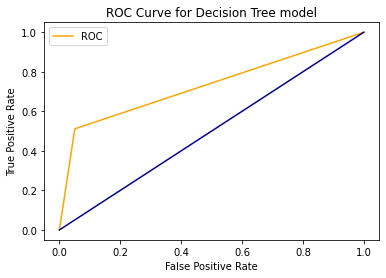

In [116]:
plt.plot(fpr2,tpr2,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree model')
plt.legend()
plt.show()

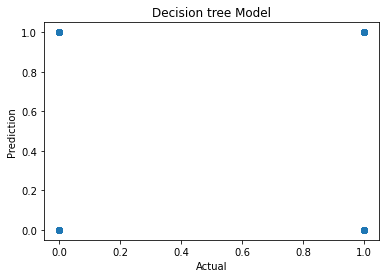

In [117]:
#conclusion for Decision Tree Model
plt.scatter(y_test,y_pred_dt)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Decision tree Model')
plt.show()

###### 4th Model Random Forest Classifier Model

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
rf=RandomForestClassifier()  #instantiate
rf.fit(x_train,y_train)

RandomForestClassifier()

In [120]:
#Training score of Random Forest Classifier Model
rf.score(x_train,y_train)

1.0

In [121]:
y_pred_rf=rf.predict(x_test)

In [122]:
#Testing score of Random Forest Model
accuracy_score(y_test,y_pred_rf)

0.8577242014742015

###### Hyperparameter Tuning for Random Forest Model

In [123]:
params={'n_estimators':[13,15],
       'criterion':['entropy'],
       'max_depth':[10,15],
       'min_samples_split':[10,11],
       'min_samples_leaf':[5,6]
       }

grd=GridSearchCV(rf,param_grid=params)
grd.fit(x_train,y_train)
print('best_params=>',grd.best_params_)

rf=grd.best_estimator_

rf.fit(x_train,y_train)
y_pred_rf1=rf.predict(x_test)

rf_conf_mat=confusion_matrix(y_test,y_pred_rf1)

print('\ncon_mat','\n',rf_conf_mat)
print('\n Accuracy rf normal',accuracy_score(y_test,y_pred_rf1))

best_params=> {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 13}

con_mat 
 [[9319  579]
 [1238 1888]]

 Accuracy rf normal 0.8604883292383292


In [124]:
accuracy_score(y_test,y_pred_rf1)

0.8604883292383292

random forest hypertuning increased by 1%

In [125]:
#plot roc curve for Decision Tree Model
fpr3,tpr3,thresholds3=roc_curve(y_test,y_pred_rf1)

In [126]:
print('False Positive Rates are :',fpr3)
print('True Positive Rates are :',tpr3)
print('Thresholds are :',thresholds3)

False Positive Rates are : [0.         0.05849667 1.        ]
True Positive Rates are : [0.         0.60396673 1.        ]
Thresholds are : [2 1 0]


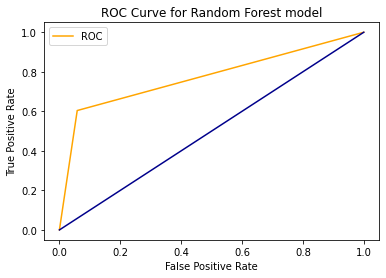

In [127]:
plt.plot(fpr3,tpr3,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest model')
plt.legend()
plt.show()

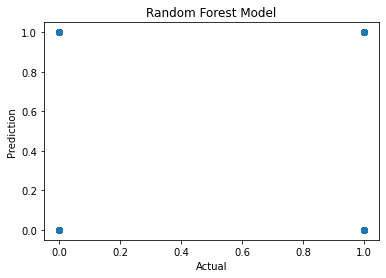

In [128]:
#conclusions of Random Forest Model
plt.scatter(y_test,y_pred_rf1)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Random Forest Model')
plt.show()

###### plot_roc_curve for fitted model

In [131]:
#training with all classifier
lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
knn.fit(x_train,y_train)

print('All Models are trained')

All Models are trained


In [132]:
#all models scores are captured
lr.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)
knn.score(x_test,y_test)

print('All Models test score captured')

All Models test score captured


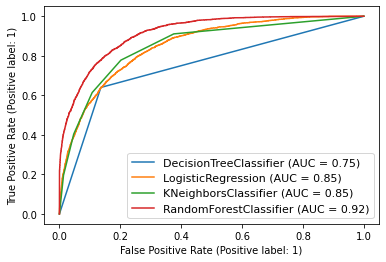

In [133]:
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import plot_roc_curve
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()      

Random Forest calssifier model gives best accuracy so we can save it from that

In [134]:
import pickle

In [135]:
filename='census.pkl'

In [136]:
pickle.dump=(rf,open('census.pkl','wb'))
